<h1>Calculating the Number of People Passing the Fremont Bridge

Genevieve Gottlieb
Big Data, Lab 1
9/20/16

In [11]:
#Open and save the file for reading
data_file = open("FreBridge1.csv", "r");
#Create empty list to store data
data_list = [];
#Put all lines from file into list
for ii in data_file:
    data_list.append(ii);
#Remove first element (column header)
del data_list[0];
#Create empty lists for westbound/eastbound people
west = [];
east = [];    
#For loop for lists
for jj in range(len(data_list)):
    #Make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #Add data to specific lists for west and east
    west.append(int(data_list[jj][1]));
    east.append(int(data_list[jj][2]));

The median going west is 1573.5
The mean going west is 1497.5666666666666
The median going east is 1648.0
The mean going east is 1540.4333333333334
The highest day going west is 22
The highest day going east is 21


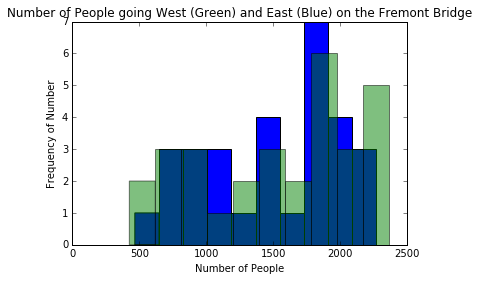

In [29]:
#Allows statistics to be used
import statistics
#Prints statistics of lists
print("The median going west is", statistics.median(west))
print("The mean going west is", statistics.mean(west))
print("The median going east is", statistics.median(east))
print("The mean going east is", statistics.mean(east))
print("The highest day going west is", west.index(max(west)))
print("The highest day going east is", east.index(max(east)))
#Imports graph and makes it
import matplotlib.pyplot as plt
% matplotlib inline
#Coordinates and details for graph
plt.hist(west)
plt.hist(east, alpha = 0.5)
plt.title("Number of People going West (Green) and East (Blue) on the Fremont Bridge")
plt.xlabel("Number of People")
plt.ylabel("Frequency of Number")

<h3>Analysis of Part 1

   In real world terms, the mean is how many people cross the Fremont Bridge on average, the median is the middle number of people who cross the bridge when in order from smallest to greatest, and there is no mode in this case, because every day a different number of people cross the bridge; there are no repeats.
   In this case, out of the mean, median, and mode, the mean and median give the most information. When outliers are present, the mean receives the information of the outliers better than the median, but the median shows where the data is due to its resistance to the outliers. For this data the mean and median will be similar, because this data is fairly regular and has no great outliers.
   Some other calculations that would give more information, are finding out how much whether the day is a weekday or weekend effects the number of people crossing, finding out how much the month or weather effects the number of people crossing, and finding out the range of how much the numbers vary from week to week.
   Monday and Tuesday have the highest number of crossings out of the week. Even more specifically, Tuesday the 22nd and Monday the 21st are the days with the highest number of crossings. This information was found by getting the maximum numbers going both west and east, and looking up what days of the week they were.

In [6]:
#Open and save the file for reading
data_file1 = open("FreBridge2.csv", "r");
#Create empty list to store data
data_list1 = [];
#Put all lines from file into list
for jj in data_file1:
    data_list1.append(jj);
#Remove first element (column header)
del data_list1[0];
#For loop for lists
for jj in range(len(data_list1)):
    #Make into a list of lists of just numbers
    data_list1[jj] = data_list1[jj].split(",");
    #Add data to specific lists for west and east
    west.append(int(data_list1[jj][1]));
    east.append(int(data_list1[jj][2]));
#Makes list for September days
sep_days = []
#Finding September 30th days
for jj in data_list1:
    if jj[0][:4]==('9/30'):
        sep_days.append(int(jj[1])+int(jj[2]))
#Prints
print("List of number of people crossing each September 30th, both west and east combined", sep_days)
#September 30th 2013 was a Monday
#September 30th 2014 was a Tuesday
#September 30th 2015 was a Wednesday
#September 30th 2016 was a Friday

List of number of people crossing each September 30th, both west and east combined [2259, 3562, 4055]


List of September 30th days 48
Min of uniform is:  1938
Max of uniform is:  4187
Mean of uniform is:  3062.5


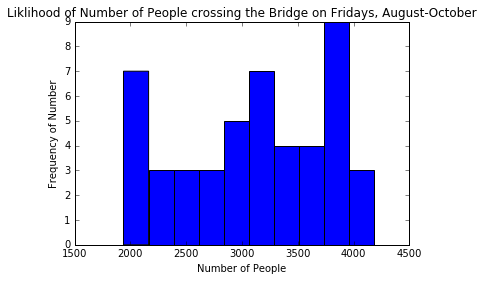

Variance of uniform is:  421500.083333
Standard deviation of uniform is: 649.2303777037341


In [10]:
#Imports
import datetime
import numpy as np
import scipy
import math;
#Create empty list to store data
relevant_days = []
for jj in data_list1:
    if jj[0][:1]==('9') or jj[0][:1]==('8') or jj[0][:2]==('10'):
        month, day, year = (int(x) for x in jj[0].split('/'));
        date = datetime.date(year, month, day);
        if date.weekday() == 4: #4 represents Friday
            relevant_days.append(int(jj[1])+int(jj[2]));
#Print stuff:
print("List of September 30th days", len(relevant_days))
#Parameters for uniform distribution, a and b, are:
print("Min of uniform is: ", np.min(relevant_days))
print("Max of uniform is: ", np.max(relevant_days))
print("Mean of uniform is: ", (np.max(relevant_days) + np.min(relevant_days))/2.0)
#Import graph and make it
import matplotlib.pyplot as plt
% matplotlib inline
#Coordinates and detail for graph
plt.hist(relevant_days);
plt.title("Liklihood of Number of People crossing the Bridge on Fridays, August-October")
plt.xlabel("Number of People")
plt.ylabel("Frequency of Number")
plt.show()
variance = ((1/12.0) * ((np.max(relevant_days) - np.min(relevant_days))**2.0))
print("Variance of uniform is: ", variance)
print("Standard deviation of uniform is:", math.sqrt(variance))

<h3>Analysis of Part 2

   I think the mean of the September 30th days would be helpful, to see what September 30th's usually are. I did this, and it did help - it showed me that there every September 30th the number of people crossing the Fremont Bridge increases. 
   Seeing as this data seems to fit best as a uniform distribution, the standard distribution is different than for normal distributions. So in this case it would not be as helpful.
   Some factors that would be helpful to consider are that the weather and the day of the week greatly impacts the number of people crossing the bridge. Depending on if it is December or July, the number will change. People would much rather be out biking or walking on a nice day rather than when it is cold and raining. The number also fluctuates depending what day of the week it is. Whether it is a weekday or the weekend influences how many people are walking. 
   I think my prediction will be within 1938 and 4187.

<h3>Conclusion

I have concluded from this lab that on Friday September 30th this year, 3050 people will pass the Fremont Bridge. The range is within 2000 and 4000. While I have given a prediction of how many people will walk across the bridge on the 30th, there is no greater chance of that than any other numbers between 2000 and 4000. The mean in this case doesn't represent an increased frequency. While I could make a confidence interval, the data is a uniform distribution, so essentially it would be repeating what I've stated already, saying that there is a 95% chance that the number is from 2000 to 4000. So while I have given a prediction of 3050, there really is an equal likelihood that any number from 2000 to 4000 is how many people will cross the bridge September 30th.